In [188]:
import os
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import statistics

In [189]:
figure_path = './figures'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

In [190]:
# Load Data https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data
path = '../data'

trainData = pd.read_csv(os.path.join(path, 'interactions_train.csv'))
validData = pd.read_csv(os.path.join(path, 'interactions_validation.csv'))
testData = pd.read_csv(os.path.join(path, 'interactions_test.csv'))
rawRecipe = pd.read_csv(os.path.join(path, 'RAW_recipes.csv'))

In [191]:
# merge with recipe information
df_trainData = pd.merge(trainData, rawRecipe, left_on='recipe_id', right_on='id', how='inner')
df_validData = pd.merge(validData, rawRecipe, left_on='recipe_id', right_on='id', how='inner')
df_testData = pd.merge(testData, rawRecipe, left_on='recipe_id', right_on='id', how='inner')

In [8]:
## Exploratory Data Analysis

In [181]:
print(len(rawRecipe))

231637


In [148]:
print(rawRecipe.columns, len(rawRecipe.columns))
# print(rawRecipe.head(1))
print(len(df_trainData))
print(len(df_validData))
print(len(df_testData))
print(len(df_trainData) + len(df_validData) + len(df_testData))
print(df_trainData.columns)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object') 12
698901
7023
12455
718379
Index(['user_id', 'recipe_id', 'date', 'rating', 'u', 'i', 'name', 'id',
       'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'weekday', 'month'],
      dtype='object')


In [16]:
users, items = defaultdict(int), defaultdict(int)
for i, row in df_trainData.iterrows():
    users[row['user_id']] += 1
    items[row['recipe_id']] += 1
print(len(users), len(items))

25076 160901


In [17]:
for i, row in df_validData.iterrows():
    users[row['user_id']] += 1
    items[row['recipe_id']] += 1
print(len(users), len(items))
for i, row in df_testData.iterrows():
    users[row['user_id']] += 1
    items[row['recipe_id']] += 1
print(len(users), len(items))

25076 167522
25076 178265


In [23]:
average_items_per_user = sum(users.values()) / len(users)
print(average_items_per_user)
average_users_per_item = sum(items.values()) / len(items)
print(average_users_per_item)

28.648069867602487
4.029837601323872


In [32]:
average_rating = sum(df_trainData['rating'].values) / len(df_trainData)
print(average_rating)

4.574089892559891


In [192]:
print(min(df_trainData['rating'].values), max(df_trainData['rating'].values))
averageRating = statistics.mean(df_trainData['rating'].values)
print(averageRating)
print(statistics.variance(df_trainData['rating'].values))

0.0 5.0
4.574089892559891
0.9197235144203892


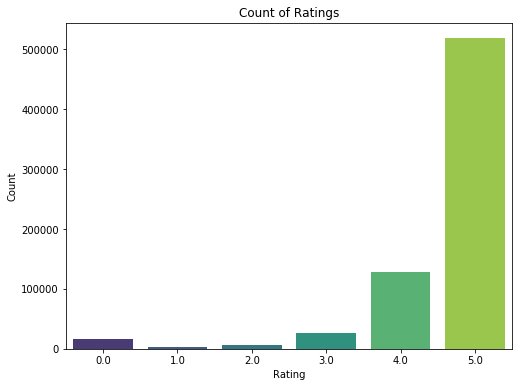

In [183]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_trainData, palette='viridis')  # Adjust palette as needed
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig(os.path.join(figure_path, 'rating_distribution.png'))
plt.show()

In [ ]:
# Visualization

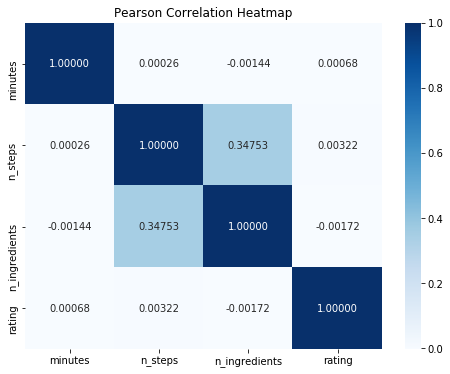

In [85]:
# PCC
train_vis = df_trainData[['minutes', 'n_steps', 'n_ingredients', 'rating']]
pcc = train_vis.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(pcc, annot=True, cmap='Blues', fmt='.5f')
plt.title('Pearson Correlation Heatmap')
plt.savefig(os.path.join(figure_path, 'pcc_heatmap.png'))
plt.show()

In [193]:
# Temporal Correlation
df_trainData['date'] = pd.to_datetime(df_trainData['date'])
df_trainData['weekday'] = df_trainData['date'].dt.day_name()
df_trainData['month'] = df_trainData['date'].dt.month_name()
df_validData['date'] = pd.to_datetime(df_validData['date'])
df_validData['weekday'] = df_validData['date'].dt.day_name()
df_validData['month'] = df_validData['date'].dt.month_name()
df_testData['date'] = pd.to_datetime(df_testData['date'])
df_testData['weekday'] = df_testData['date'].dt.day_name()
df_testData['month'] = df_testData['date'].dt.month_name()

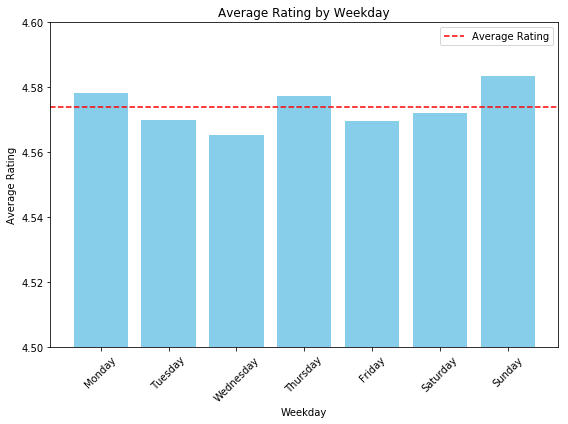

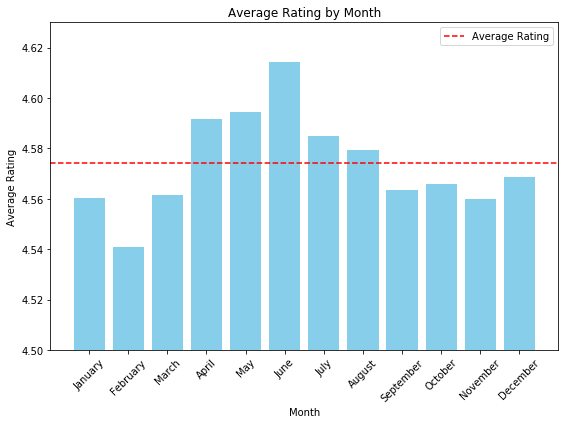

In [133]:
# rating by weekday
avg_rating_by_weekday = df_trainData.groupby('weekday')['rating'].mean().reset_index()

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_rating_by_weekday['weekday'] = pd.Categorical(avg_rating_by_weekday['weekday'], categories=weekdays_order, ordered=True)
avg_rating_by_weekday = avg_rating_by_weekday.sort_values('weekday')

plt.figure(figsize=(8, 6))
plt.bar(avg_rating_by_weekday['weekday'], avg_rating_by_weekday['rating'], color='skyblue')
plt.axhline(y=averageRating, color='red', linestyle='--', label='Average Rating')
plt.title('Average Rating by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Rating')
plt.ylim(4.5, 4.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend()
plt.savefig(os.path.join(figure_path, 'avg_rating_by_weekday.png'))
plt.show()

# rating by month
avg_rating_by_month = df_trainData.groupby('month')['rating'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_rating_by_month['month'] = pd.Categorical(avg_rating_by_month['month'], categories=month_order, ordered=True)
avg_rating_by_month = avg_rating_by_month.sort_values('month')

plt.figure(figsize=(8, 6))
plt.bar(avg_rating_by_month['month'], avg_rating_by_month['rating'], color='skyblue')
plt.axhline(y=averageRating, color='red', linestyle='--', label='Average Rating')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(4.5, 4.63)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend()
plt.savefig(os.path.join(figure_path, 'avg_rating_by_month.png'))
plt.show()

In [ ]:
## Simple Regression (not considering user)

In [197]:
one_hot_order = ['weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 
                 'weekday_Saturday', 'weekday_Sunday', 'month_January', 'month_February', 'month_March', 
                 'month_April', 'month_May', 'month_June', 'month_July', 'month_August', 'month_September', 
                 'month_October', 'month_November', 'month_December']

df_X_train_feat = df_trainData[['minutes', 'n_steps', 'n_ingredients', 'weekday', 'month']]

df_encoded_train = pd.get_dummies(df_trainData, columns=['weekday', 'month'])
df_encoded_train = df_encoded_train.reindex(columns=one_hot_order)

df_X_train_feat = pd.concat([df_X_train_feat, df_encoded_train], axis=1)
df_X_train_feat = df_X_train_feat.drop(['weekday', 'month'], axis=1)

y_train_lr = df_trainData['rating']

df_X_valid_feat = df_validData[['minutes', 'n_steps', 'n_ingredients', 'weekday', 'month']]

df_encoded_valid = pd.get_dummies(df_validData, columns=['weekday', 'month'])
df_encoded_valid = df_encoded_valid.reindex(columns=one_hot_order)
                                            
df_X_valid_feat = pd.concat([df_X_valid_feat, df_encoded_valid], axis=1)
df_X_valid_feat = df_X_valid_feat.drop(['weekday', 'month'], axis=1)

y_valid_lr = df_validData['rating'] 

df_X_test_feat = df_testData[['minutes', 'n_steps', 'n_ingredients', 'weekday', 'month']]

df_encoded_test = pd.get_dummies(df_testData, columns=['weekday', 'month'])
df_encoded_test = df_encoded_test.reindex(columns=one_hot_order)
                                            
df_X_test_feat = pd.concat([df_X_test_feat, df_encoded_test], axis=1)
df_X_test_feat = df_X_test_feat.drop(['weekday', 'month'], axis=1)

y_test_lr = df_testData['rating'] 

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [213]:
scaler = MinMaxScaler()

df_X_train_lr = scaler.fit_transform(df_X_train_feat)
df_X_valid_lr = scaler.transform(df_X_valid_feat)
df_X_test_lr = scaler.transform(df_X_test_feat)

In [155]:
lr = Ridge(alpha=1.)

lr.fit(df_X_train_lr, y_train_lr)
y_pred = lr.predict(df_X_valid_lr)

y_pred_baseline = [averageRating] * len(y_valid_lr)
baseline_rmse = mean_squared_error(y_pred_baseline, y_valid_lr, squared=False)
print(baseline_rmse)

rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
print(rmse)

1.3467762177066076
1.3467520342925552


In [141]:
cv = []
for c in [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0, 1000.0, 10000.0]:
    lr = Ridge(alpha=c)
    lr.fit(df_X_train_lr, y_train_lr)
    y_pred = lr.predict(df_X_valid_lr)
    rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
    cv.append((rmse, c))

cv.sort()
print(cv[:3])

[(1.346698563514695, 10000.0), (1.346741959269668, 1000.0), (1.346751469335064, 100.0)]


In [147]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=258)

rf.fit(df_X_train_lr, y_train_lr)
y_pred = rf.predict(df_X_valid_lr)

rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
print(rmse)

1.3467893060647858


In [214]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=258)

rf.fit(df_X_train_lr, y_train_lr)
y_pred = rf.predict(df_X_test_lr)

rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.3856472235970512


In [173]:
# Evaluate on testset
lr = Ridge(alpha=10000.0)
lr.fit(df_X_train_lr, y_train_lr)
y_pred = lr.predict(df_X_test_lr)

y_pred_baseline = [averageRating] * len(y_test_lr)
baseline_rmse = mean_squared_error(y_pred_baseline, y_test_lr, squared=False)
print(baseline_rmse)

rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.3862790332522013
1.3859217838462696


In [158]:
## Latent Factor Model

In [164]:
import scipy
from fastFM import als

In [166]:
# user_id and item_id to index
user_to_id, item_to_id = {}, {}
uid, iid = 0, 0
for i, row in df_trainData.iterrows():
    user, item = row['user_id'], row['recipe_id']
    if user not in user_to_id:
        user_to_id[user] = uid
        uid += 1
    if item not in item_to_id:
        item_to_id[item] = iid
        iid += 1
        
n_users, n_items = len(user_to_id), len(item_to_id)

In [167]:
X_train = scipy.sparse.lil_matrix((len(df_trainData), n_users + n_items))
X_valid = scipy.sparse.lil_matrix((len(df_validData), n_users + n_items))
X_test = scipy.sparse.lil_matrix((len(df_testData), n_users + n_items))

In [171]:
for i, row in df_trainData.iterrows():
    user = user_to_id[row['user_id']]
    item = item_to_id[row['recipe_id']]
    X_train[i, user] = 1
    X_train[i, n_users + item] = 1
    
for i, row in df_validData.iterrows():
    user = user_to_id.get(row['user_id'], None)
    item = item_to_id.get(row['recipe_id'], None) 
    if user is not None:
        X_valid[i, user] = 1
    if item is not None:
        X_valid[i, n_users + item] = 1
    
for i, row in df_testData.iterrows():
    user = user_to_id.get(row['user_id'], None)
    item = item_to_id.get(row['recipe_id'], None) 
    if user is not None:
        X_test[i, user] = 1
    if item is not None:
        X_test[i, n_users + item] = 1

In [172]:
y_train = df_trainData['rating'].values
y_valid = df_validData['rating'].values
y_test = df_testData['rating'].values

In [179]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=5, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X_train, y_train)
y_pred = fm.predict(X_valid)

y_pred_baseline = [averageRating] * len(y_valid_lr)
baseline_rmse = mean_squared_error(y_pred_baseline, y_valid_lr, squared=False)
print(baseline_rmse)

rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
print(rmse)

1.3467762177066076
1.298595235269419


In [180]:
cv = []
for k in range(1, 10):
    fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=k, l2_reg_w=0.1, l2_reg_V=0.5)
    fm.fit(X_train, y_train)
    y_pred = fm.predict(X_valid)
    rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
    cv.append((rmse, k, fm))

cv.sort()
print([(a, b) for a, b, _ in cv])

[(1.282365742599351, 9), (1.286023648736212, 8), (1.290132904721225, 7), (1.2916077905654575, 6), (1.298595235269419, 5), (1.3032605569847935, 4), (1.307344148761027, 3), (1.3113639127107222, 2), (1.3144198244622776, 1)]


In [222]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=9, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X_train, y_train)
y_pred = fm.predict(X_test)
rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.334596172621381


In [185]:
# Personalized Baseline
users = defaultdict(list)
for i, row in df_trainData.iterrows():
    user = row['user_id']
    users[user].append(row['rating'])
users_baseline = {u: sum(r) / len(r) for u, r in users.items()}
print(len(users_baseline))

25076


In [186]:
y_pred_baseline2 = [users_baseline.get(row['user_id'], averageRating) for _, row in df_testData.iterrows()]
baseline2_rmse = mean_squared_error(y_pred_baseline2, y_test_lr, squared=False)
print(baseline2_rmse)

1.3540365982179596


In [ ]:
# FM with different combination of features

In [199]:
# Weekday and Month
X_train_temporal = scipy.sparse.csr_matrix(df_X_train_feat[one_hot_order].values)
X_valid_temporal = scipy.sparse.csr_matrix(df_X_valid_feat[one_hot_order].values)
X_test_temporal = scipy.sparse.csr_matrix(df_X_test_feat[one_hot_order].values)
X_train_i_t = scipy.sparse.hstack([X_train, X_train_temporal])
X_valid_i_t = scipy.sparse.hstack([X_valid, X_valid_temporal])
X_test_i_t = scipy.sparse.hstack([X_test, X_test_temporal])

In [202]:
cv_i_t = []
for k in range(1, 10):
    fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=k, l2_reg_w=0.1, l2_reg_V=0.5)
    fm.fit(X_train_i_t, y_train)
    y_pred = fm.predict(X_valid_i_t)
    rmse = mean_squared_error(y_pred, y_valid_lr, squared=False)
    cv_i_t.append((rmse, k, fm))

cv_i_t.sort()
print([(a, b) for a, b, _ in cv_i_t])

[(1.279352759315971, 9), (1.2842748585219432, 8), (1.291594358379114, 7), (1.2954590355832185, 6), (1.301699095657578, 5), (1.306242240626027, 4), (1.3130443230132562, 3), (1.3179666687726823, 2), (1.320079500049323, 1)]


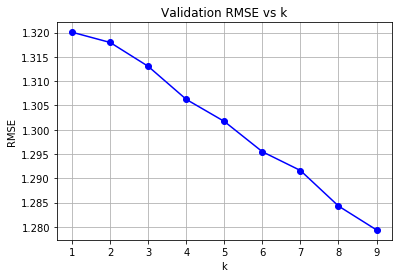

In [225]:
cv_i_t.sort(key=lambda x: x[1])
x = [k for _, k in cv_i_t]
y = [r for r, _ in cv_i_t]

plt.plot(x, y, marker='o', linestyle='-', color='b')  # Adjust marker, linestyle, color as needed
plt.title('Validation RMSE vs k')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.xticks(x)
plt.grid(True)
plt.savefig(os.path.join(figure_path, 'rmse_vs_k.png'))
plt.show()

In [215]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=9, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X_train_i_t, y_train)
y_pred = fm.predict(X_test_i_t)
rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.3352324437953018


In [217]:
print(df_X_train_feat.columns)
print(df_X_train_lr[:,0:3].shape)

Index(['minutes', 'n_steps', 'n_ingredients', 'weekday_Monday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'month_January',
       'month_February', 'month_March', 'month_April', 'month_May',
       'month_June', 'month_July', 'month_August', 'month_September',
       'month_October', 'month_November', 'month_December'],
      dtype='object')
(698901, 3)


In [218]:
# Minutes, n_ingredients and n_steps
X_train_fs = scipy.sparse.csr_matrix(df_X_train_lr[:,0:3])
X_valid_fs = scipy.sparse.csr_matrix(df_X_valid_lr[:,0:3])
X_test_fs = scipy.sparse.csr_matrix(df_X_test_lr[:,0:3])
X_train_i_f = scipy.sparse.hstack([X_train, X_train_fs])
X_valid_i_f = scipy.sparse.hstack([X_valid, X_valid_fs])
X_test_i_f = scipy.sparse.hstack([X_test, X_test_fs])

In [219]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=9, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X_train_i_f, y_train)
y_pred = fm.predict(X_test_i_f)
rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.3375977011087912


In [220]:
# All
X_train_all = scipy.sparse.hstack([X_train, X_train_temporal, X_train_fs])
X_valid_all = scipy.sparse.hstack([X_valid, X_valid_temporal, X_valid_fs])
X_test_all = scipy.sparse.hstack([X_test, X_test_temporal, X_test_fs])

In [221]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=9, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X_train_all, y_train)
y_pred = fm.predict(X_test_all)
rmse = mean_squared_error(y_pred, y_test_lr, squared=False)
print(rmse)

1.3363833408008094
